# k-Means Clustering


In [51]:
import random
%pylab inline
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [17]:
np.random.seed(0)

In [13]:
df = pd.read_csv('Cust_Segmentation.csv')

In [14]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [15]:
'''
Remove Address
'''
df = df.drop('Address' , axis=1)
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [23]:
x = df.values[:,1:]

In [24]:
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [25]:
x = np.nan_to_num(x)

In [26]:
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [28]:
x = StandardScaler().fit_transform(x)

In [29]:
x

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [32]:
num_clusters = 3
k_means = KMeans(init = "k-means++" , n_clusters = num_clusters , n_init = 12)

In [33]:
k_means.fit(x)

KMeans(n_clusters=3, n_init=12)

In [45]:
k_means_cluster_centers = k_means.cluster_centers_
print("Cluster Centers : " )
for i in k_means_cluster_centers:
    print(i)

Cluster Centers : 
[ 0.99177377  0.238757    1.27421461  1.43518566  1.24440502  1.43538377
 -0.20933559  0.55751711]
[-0.15079661 -0.1156513  -0.13879518 -0.27341128 -0.34062604 -0.37150218
 -0.52379654 -0.32859213]
[-3.90439547e-01  1.62695612e-01 -6.79376729e-01 -3.86448408e-01
 -6.83901553e-05 -6.93056978e-02  1.87982575e+00  5.69270845e-01]


In [46]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1,

In [47]:
df['Clusters'] = k_means_labels

In [48]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clusters
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,1
846,847,28,2,7,34,0.359,2.021,0.0,7.0,1
847,848,25,4,0,18,2.802,3.210,1.0,33.4,2
848,849,32,1,12,28,0.116,0.696,0.0,2.9,1


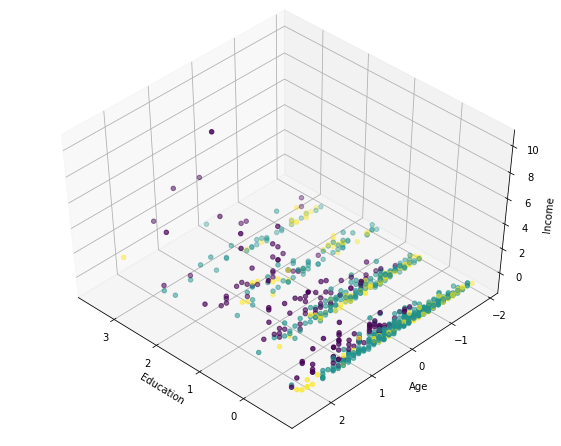

In [59]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(x[:, 1], x[:, 0], x[:, 3], c= k_means_labels)
